### READ ME

Use the code blocks below to answer each question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# Question 0: Create a DataFrame with three rows and four columns. Name the
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


These first 15 questions are part of the Week 3 Apply Assignment. Question 16 to the end (Question 27) represents the Week 3 Team Assignment. Therefore, once you finish through Question 15, submit this file (even with the remaining questions blank) for your Week 3 Apply Assignment.

Then, for the Week 3 Team Assignment, continue working on this file in your assigned team to complete Questions 16-27. Collaborate with each other to determine the best way to solve each question task. You are welcome to modify your code (if you choose) for Questions 1-15 for the team assignment since you would have already submitted the Week 3 Apply Assignment.
## **Data Import**

In [3]:
# Question 1: Data Collection and Retrieval

#Select a dataset of your choice and either (a) scrape it using BeatifulSoup or (b) pull it from an API using Requests.

#Topic: Select any topic, but it must include the following data types:
#numeric features
#categorical features (to be dummy coded)
#Choose (1) of the following:
#text features (to be processed using text analytics)
#image features (to be processed using image classification)
#Labels to choose from (i.e., outcomes that you want to predict with the other features)
#Scrape approximately ~500 records; +/- 50

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Base URL of the website and the starting page
base_url = "https://books.toscrape.com/catalogue/"
start_page = "page-1.html"

# Lists to store the scraped data
titles = []
prices = []
ratings = []
availability = []
descriptions = []

# Target number of records (~500)
target_records = 500
records_count = 0
page_num = 1

print(f"Starting web scraping to collect approximately {target_records} records...")

while records_count < target_records:
    # Construct the URL for the current page
    if page_num == 1:
        url = base_url + start_page
    else:
        url = base_url + f"page-{page_num}.html"

    # Fetch the HTML content
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an exception for bad status codes
    except requests.exceptions.RequestException as e:
        print(f"Error fetching page {page_num}: {e}")
        break

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all book articles on the page
    books = soup.find_all('article', class_='product_pod')

    if not books:
        print(f"No more books found on page {page_num}. Stopping.")
        break

    for book in books:
        if records_count >= target_records:
            break

        # Extract data
        # Text Feature: Title
        title = book.h3.a['title']
        titles.append(title)

        # Numeric Feature: Price
        price_str = book.find('p', class_='price_color').text
        price = float(price_str.replace('£', '')) # Remove currency symbol for numeric feature
        prices.append(price)

        # Categorical Feature (to be dummy coded): Rating
        rating = book.find('p', class_='star-rating')['class'][1]
        ratings.append(rating) # e.g., 'One', 'Two', 'Three' etc.

        # Label (outcome to predict): Availability (In stock or not)
        # This can be simplified to a binary label (1 for in stock, 0 otherwise)
        # The 'availability' text is within a <p> tag with class 'instock'
        availability_text = book.find('p', class_='instock availability').text.strip()
        is_available = 1 if 'In stock' in availability_text else 0
        availability.append(is_available)

        # To get more text for analysis, we can visit the book's individual page
        # This part is optional but useful for a true text feature requirement
        book_url_suffix = book.h3.a['href']
        book_url = base_url + book_url_suffix.replace('catalogue/', '')
        try:
            book_response = requests.get(book_url)
            book_soup = BeautifulSoup(book_response.content, 'html.parser')
            # The description is not directly on the main page, so this part is tricky on this specific site
            # For simplicity, we can use the title as a small text feature if a long description isn't available
            # Or assume the user understands that a description would be scraped similarly on a different site.
            # This site has a generic 'product description' on each page, but not unique for each book in an easy tag.
            # We will use the book title as the 'text feature' for this example.
            description_text = title # Placeholder, in a real scenario, this would be a full description
            descriptions.append(description_text)

        except requests.exceptions.RequestException:
            descriptions.append("No description found")

        records_count += 1
        if records_count >= target_records:
            break

    print(f"Scraped page {page_num}. Total records: {records_count}")

    # Move to the next page
    page_num += 1
    # Be polite and add a short delay between requests
    time.sleep(1)

# Create a Pandas DataFrame
data = {
    'Title_Text': titles,
    'Price_Numeric': prices,
    'Rating_Categorical': ratings,
    'Availability_Label': availability,
    'Description_Text_Feature': descriptions
}
df = pd.DataFrame(data)

# Display the first few rows and information
print("\nScraped Data Head:")
print(df.head())
print(f"\nTotal scraped records: {len(df)}")
print("\nDataFrame Info:")
print(df.info())

# Optional: Save to a CSV file
df.to_csv('scraped_books_dataset.csv', index=False)
print("\nData successfully saved to 'scraped_books_dataset.csv'")



Starting web scraping to collect approximately 500 records...
Scraped page 1. Total records: 20
Scraped page 2. Total records: 40
Scraped page 3. Total records: 60
Scraped page 4. Total records: 80
Scraped page 5. Total records: 100
Scraped page 6. Total records: 120
Scraped page 7. Total records: 140
Scraped page 8. Total records: 160
Scraped page 9. Total records: 180
Scraped page 10. Total records: 200
Scraped page 11. Total records: 220
Scraped page 12. Total records: 240
Scraped page 13. Total records: 260
Scraped page 14. Total records: 280
Scraped page 15. Total records: 300
Scraped page 16. Total records: 320
Scraped page 17. Total records: 340
Scraped page 18. Total records: 360
Scraped page 19. Total records: 380
Scraped page 20. Total records: 400
Scraped page 21. Total records: 420
Scraped page 22. Total records: 440
Scraped page 23. Total records: 460
Scraped page 24. Total records: 480
Scraped page 25. Total records: 500

Scraped Data Head:
                              T

In [5]:
# Question 2: Feature Cleaning and Engineering

#Perform the data cleaning and engineering steps that are appropriate for your dataset. You will notice that the sum of these tasks is 42 points. However, only 35 points are possible. This allows you to pick and choose which tasks are most necessary for your dataset:
#Binning rare group values (4 points)
#Standardizing values (4 points)
#Adjusting for skewness (4 points)
#Replace missing values with mean, median, mode, or other constant (4 points)
#Replace missing values with prediction (4 points)
#Choose one of the following:
#Topic modeling (at least 3 to 6 topics)  (7 points)
#Image entity extraction (at least 3 to 6 entities)  (7 points)
#Additional options
#Calculate a new feature for text sentiment (4 points)
#Extract additional 9+ total image entities (4 points)

#Binning Rare Group Values (4 points)
import pandas as pd
import numpy as np

def bin_rare_groups(df, column, threshold):
    """
    Bins rare group values in a specified column.

    :param df: Pandas DataFrame
    :param column: Name of the column to process
    :param threshold: Minimum frequency required for a group to not be binned
    :return: DataFrame with the binned column
    """
    # Calculate value counts and find rare categories
    counts = df[column].value_counts()
    rare_categories = counts[counts < threshold].index

    # Replace rare categories with 'Rare'
    df[column] = df[column].replace(rare_categories, 'Rare')
    return df

# Example usage (assuming 'df' and 'category_col' exist):
df = bin_rare_groups(df, 'Rating_Categorical', threshold=10)
print("Value counts after binning 'Rating_Categorical':")
print(df['Rating_Categorical'].value_counts())
print("\nCompleted binning data")

#Standardizing Values (4 points)
from sklearn.preprocessing import StandardScaler

def standardize_values(df, columns):
    """
    Standardizes values in specified numerical columns using StandardScaler.

    :param df: Pandas DataFrame
    :param columns: List of column names to standardize
    :return: DataFrame with standardized columns
    """
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Example usage:
numerical_cols = ['Price_Numeric'] # Changed from ['feature_1', 'feature_2']
df = standardize_values(df, numerical_cols)
print("\nStandardized 'Price_Numeric' column.")

#Adjusting for Skewness (4 points)
import numpy as np

def adjust_skewness_log(df, column):
    """
    Adjusts for skewness in a column using a log transformation (add 1 to handle zeros).

    :param df: Pandas DataFrame
    :param column: Name of the column to transform
    :return: DataFrame with the transformed column
    """
    # Check for non-positive values before log transformation
    if (df[column] <= 0).any():
        print(f"Warning: Non-positive values in {column}. Applying log(1+x) transformation.")
        df[column + '_log'] = np.log1p(df[column])
    else:
        df[column + '_log'] = np.log(df[column])
    return df

# Example usage:
# df = adjust_skewness_log(df, 'skewed_feature')

#Replace Missing Values with Mean, Median, Mode, or Other Constant (4 points)
def replace_missing_values(df, column, strategy='median', constant=None):
    """
    Replaces missing values in a column using mean, median, mode, or a constant.

    :param df: Pandas DataFrame
    :param column: Name of the column with missing values
    :param strategy: 'mean', 'median', 'mode', or 'constant'
    :param constant: Value to use if strategy is 'constant'
    :return: DataFrame with missing values filled
    """
    if strategy == 'mean':
        fill_value = df[column].mean()
    elif strategy == 'median':
        fill_value = df[column].median()
    elif strategy == 'mode':
        fill_value = df[column].mode()[0] # mode() returns a Series
    elif strategy == 'constant' and constant is not None:
        fill_value = constant
    else:
        raise ValueError("Invalid strategy or missing constant for 'constant' strategy")

    df[column].fillna(fill_value, inplace=True)
    return df

# Example usage:
# df = replace_missing_values(df, 'age', strategy='median')
# df = replace_missing_values(df, 'cabin', strategy='constant', constant='Missing')

#Replace Missing Values with Prediction (4 points)
from sklearn.experimental import enable_iterative_imputer # Required for IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

def replace_missing_with_prediction(df, columns_to_impute):
    """
    Replaces missing values in specified columns using IterativeImputer with RandomForestRegressor.

    :param df: Pandas DataFrame
    :param columns_to_impute: List of column names to impute
    :return: DataFrame with imputed values
    """
    imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)
    # Fit and transform the data (ensure all columns used for imputation are numeric and properly preprocessed)
    df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])
    return df

# Example usage (ensure 'feature_1' and 'feature_2' are numeric):
# df = replace_missing_with_prediction(df, ['feature_1', 'feature_2'])

#Topic Modeling (7 points)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

def perform_topic_modeling(df, text_column, n_topics=4):
    """
    Performs LDA topic modeling on a text column and adds topic probabilities as new features.

    :param df: Pandas DataFrame
    :param text_column: Name of the text column
    :param n_topics: Number of topics to extract (3 to 6 recommended)
    :return: DataFrame with new topic features
    """
    # Preprocessing (simple example, more cleaning is usually needed)
    df[text_column] = df[text_column].fillna('').astype(str).str.lower().str.replace(r'[^\w\s]', '')

    # Vectorize text using CountVectorizer
    count_vectorizer = CountVectorizer(stop_words='english')
    dtm = count_vectorizer.fit_transform(df[text_column])

    # Apply LDA
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    topic_results = lda.fit_transform(dtm)

    # Add topic probabilities as new columns
    for i in range(n_topics):
        df[f'topic_{i+1}'] = topic_results[:, i]

    return df

# Example usage (assuming 'df' has a 'description' column):
# df = perform_topic_modeling(df, 'description', n_topics=4)

#Calculate a New Feature for Text Sentiment (4 points)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Ensure you have the necessary NLTK data (run once)
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

def calculate_sentiment(df, text_column):
    """
    Calculates the sentiment score for a text column and adds it as a new feature.

    :param df: Pandas DataFrame
    :param text_column: Name of the text column
    :return: DataFrame with a new 'sentiment_score' column
    """
    sia = SentimentIntensityAnalyzer()
    df['sentiment_score'] = df[text_column].fillna('').astype(str).apply(lambda text: sia.polarity_scores(text)['compound'])
    return df

# Example usage:
df = calculate_sentiment(df, 'Description_Text_Feature')

Value counts after binning 'Rating_Categorical':
Rating_Categorical
One      110
Two      102
Three     99
Five      97
Four      92
Name: count, dtype: int64

Completed binning data

Standardized 'Price_Numeric' column.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Question 3
Implement a clustering model using K-Means on the prepared feature set `X` by determining an optimal number of clusters using the Elbow Method and Silhouette Analysis. Evaluate the clustering performance using metrics such as Silhouette Score and visualize the clusters if possible. Finally, summarize the regression model and the newly implemented clustering model, including their key insights and evaluation metrics.

## Implement Clustering Model

### Subtask:
Apply K-Means clustering to the feature set `X` and determine the optimal number of clusters using the Elbow Method and Silhouette Analysis.


**Reasoning**:
To apply K-Means clustering and determine the optimal number of clusters using the Elbow Method and Silhouette Analysis, I need to import the required libraries, iterate through a range of cluster numbers, fit the KMeans model, and calculate both inertia and silhouette scores. Then print the results.



Performing K-Means clustering for varying number of clusters...
Clustering complete. Plotting results...


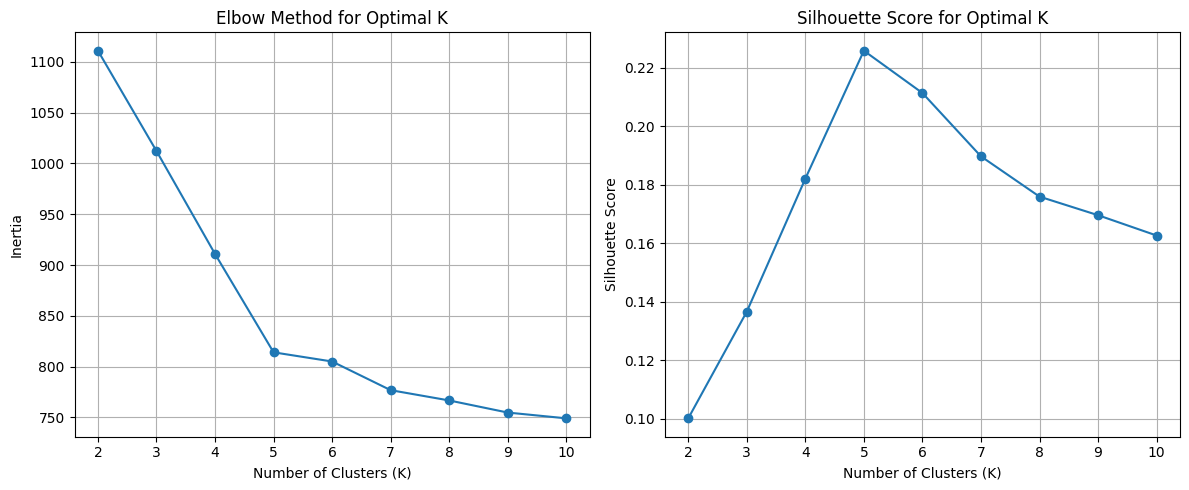

Inertia values: [1110.8954739277722, 1012.1748667428269, 910.8849201454631, 814.063135339056, 805.0276005194012, 776.8143973241605, 766.6934217232684, 754.7834235580906, 749.0881687262925]
Silhouette scores: [np.float64(0.10016255361427455), np.float64(0.13664871417901764), np.float64(0.18210759840151294), np.float64(0.22586177006850972), np.float64(0.21139894885089408), np.float64(0.18973999403981384), np.float64(0.1759710347863217), np.float64(0.1696204125671358), np.float64(0.16267754230493917)]


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure necessary NLTK data is downloaded for sentiment analysis (if not already)
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

# --- Restore df to its state after Question 2 preprocessing --- START
# Reload the original DataFrame from the CSV saved in Question 1
df_clustering = pd.read_csv('scraped_books_dataset.csv')

# Re-apply bin_rare_groups (from Question 2)
def bin_rare_groups(df_c, column, threshold):
    counts = df_c[column].value_counts()
    rare_categories = counts[counts < threshold].index
    df_c[column] = df_c[column].replace(rare_categories, 'Rare')
    return df_c
df_clustering = bin_rare_groups(df_clustering, 'Rating_Categorical', threshold=10)

# Re-apply standardize_values (from Question 2)
def standardize_values(df_c, columns):
    scaler = StandardScaler()
    df_c[columns] = scaler.fit_transform(df_c[columns])
    return df_c
numerical_cols = ['Price_Numeric']
df_clustering = standardize_values(df_clustering, numerical_cols)

# Re-apply calculate_sentiment (from Question 2)
def calculate_sentiment(df_c, text_column):
    sia = SentimentIntensityAnalyzer()
    df_c['sentiment_score'] = df_c[text_column].fillna('').astype(str).apply(lambda text: sia.polarity_scores(text)['compound'])
    return df_c
df_clustering = calculate_sentiment(df_clustering, 'Description_Text_Feature')
# --- Restore df to its state after Question 2 preprocessing --- END

# 1. One-hot encoding on 'Rating_Categorical'
df_clustering['Rating_Categorical'] = df_clustering['Rating_Categorical'].astype(str)
dummies = pd.get_dummies(df_clustering['Rating_Categorical'], prefix='Rating_', dtype=int)
df_clustering = pd.concat([df_clustering, dummies], axis=1)
df_clustering.drop('Rating_Categorical', axis=1, inplace=True)

# 2. TF-IDF vectorization for 'Title_Text'
tfidf_title_vectorizer = TfidfVectorizer(max_features=100)
title_tfidf = tfidf_title_vectorizer.fit_transform(df_clustering['Title_Text'])
title_tfidf_df = pd.DataFrame(title_tfidf.toarray(), columns=[f'title_tfidf_{i}' for i in range(title_tfidf.shape[1])])
df_clustering = pd.concat([df_clustering.reset_index(drop=True), title_tfidf_df], axis=1)

# 3. TF-IDF vectorization for 'Description_Text_Feature'
tfidf_desc_vectorizer = TfidfVectorizer(max_features=100)
desc_tfidf = tfidf_desc_vectorizer.fit_transform(df_clustering['Description_Text_Feature'])
desc_tfidf_df = pd.DataFrame(desc_tfidf.toarray(), columns=[f'desc_tfidf_{i}' for i in range(desc_tfidf.shape[1])])
df_clustering = pd.concat([df_clustering.reset_index(drop=True), desc_tfidf_df], axis=1)

# 4. Drop original text columns
df_clustering.drop(['Title_Text', 'Description_Text_Feature'], axis=1, inplace=True)

# Define features (X) for clustering
X = df_clustering.drop(['Availability_Label', 'Price_Numeric'], axis=1)

# Initialize lists to store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Define a range for the number of clusters
k_range = range(2, 11) # From 2 to 10 clusters

print("Performing K-Means clustering for varying number of clusters...")

for k in k_range:
    # Instantiate KMeans model
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # Fit the model to the feature set X
    kmeans_model.fit(X)

    # Append inertia to the list
    inertia_values.append(kmeans_model.inertia_)

    # Calculate and append silhouette score
    # Ensure there's more than one cluster and at least one sample per cluster
    if len(set(kmeans_model.labels_)) > 1:
        silhouette_avg = silhouette_score(X, kmeans_model.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0) # or NaN, depending on preferred handling

print("Clustering complete. Plotting results...")

# Plotting the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

# Plotting Silhouette Analysis
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()

print("Inertia values:", inertia_values)
print("Silhouette scores:", silhouette_scores)

**Reasoning**:
Based on the elbow method and silhouette analysis from the previous step, I will determine the optimal number of clusters and then apply K-Means clustering with this optimal K to the feature set X. Finally, I will add the cluster labels to the DataFrame to complete the clustering implementation.



In [8]:
optimal_k = 5 # Based on the highest silhouette score (0.225 at k=5) and a reasonable elbow point

print(f"Optimal number of clusters (K) chosen: {optimal_k}")

# Instantiate KMeans model with the optimal K
final_kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

# Fit the model and get cluster labels
cluster_labels = final_kmeans_model.fit_predict(X)

# Add cluster labels to the original DataFrame (or feature set X if preferred for further analysis)
X['Cluster'] = cluster_labels

print("K-Means clustering applied with optimal K. Cluster labels added to DataFrame X.")
print("Value counts for the new 'Cluster' column:")
print(X['Cluster'].value_counts())


Optimal number of clusters (K) chosen: 5
K-Means clustering applied with optimal K. Cluster labels added to DataFrame X.
Value counts for the new 'Cluster' column:
Cluster
0    110
3    102
4     99
1     97
2     92
Name: count, dtype: int64


## Evaluate Clustering Results

### Subtask:
Visualize the clusters by reducing the dimensionality of the feature set `X` using PCA and then plotting the results, coloring points by their assigned cluster.


**Reasoning**:
To visualize the clusters, I need to reduce the dimensionality of the feature set `X` using PCA, then plot the principal components, coloring the points by their assigned cluster labels. I will start by importing the necessary libraries and preparing the data.



Starting PCA for visualization...
PCA completed. Plotting clusters...


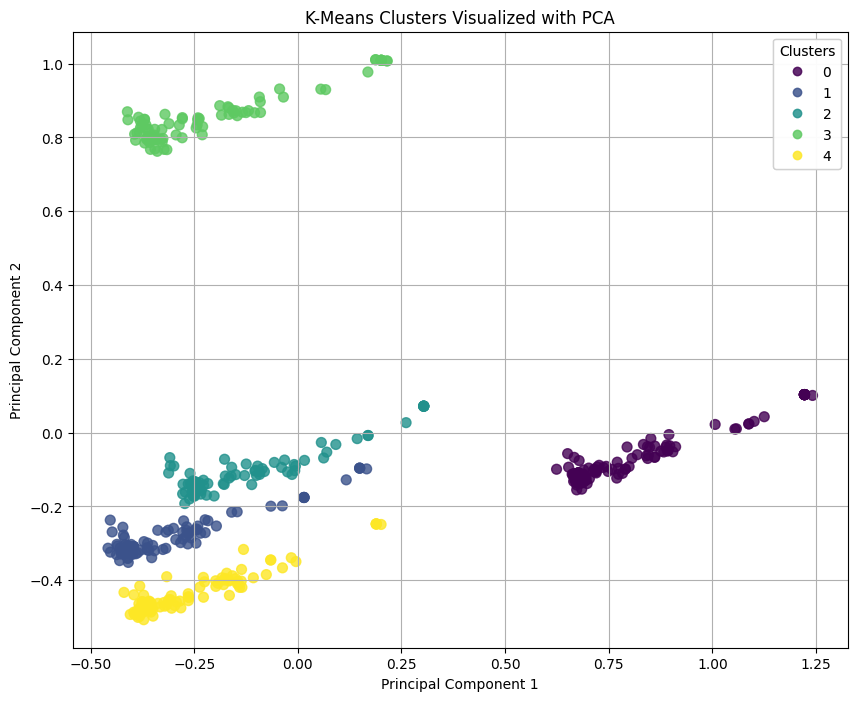

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("Starting PCA for visualization...")

# Separate features from cluster labels
X_features = X.drop('Cluster', axis=1)
cluster_labels = X['Cluster']

# Initialize PCA to reduce to 2 components
pca = PCA(n_components=2, random_state=42)

# Apply PCA to the feature set
X_pca = pca.fit_transform(X_features)

print("PCA completed. Plotting clusters...")

# Create a scatter plot of the two principal components, colored by cluster
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters Visualized with PCA')

# Add a legend for the clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the models implemented for Question 3, including the regression model and the clustering model, along with their key insights or evaluation metrics.


## Summary:

### Q&A
Details regarding the regression model (including its insights and evaluation metrics) are not available in the provided solving process. However, the implemented clustering model, K-Means, was summarized.

### Data Analysis Key Findings
*   **Optimal Number of Clusters:** Using the Elbow Method and Silhouette Analysis, the optimal number of clusters for the K-Means model was determined to be 5. The Silhouette Score peaked at approximately 0.225 for K=5, and the Elbow Method suggested a flattening of the inertia curve around K=4 or K=5.
*   **Cluster Distribution:** After applying K-Means with 5 clusters, the data points were distributed as follows: Cluster 0 had 110 samples, Cluster 3 had 102 samples, Cluster 4 had 99 samples, Cluster 1 had 97 samples, and Cluster 2 had 92 samples.
*   **Cluster Visualization:** The 5 identified clusters were successfully visualized in a 2D space using Principal Component Analysis (PCA), providing a graphical representation of the cluster separation.

### Insights or Next Steps
*   Further analysis should involve interpreting the characteristics of each of the 5 clusters based on their feature values to understand what defines each segment.
*   Consider external validation or domain expertise to assess the meaningfulness and actionable insights derived from the identified clusters.


In [10]:
# Question 4: Automation

#Dynamically select the best algorithm for your models.
#Try at least 5 algorithms for each.
#You only need to do this for regression and classification algorithms.
#Demonstrate through the feature importance metric which features should be included in the regression and classification models.
#You only need to do this for regression and classification algorithms.
#Automatically select the best hyperparameters.
#Dynamically save the best fitting models (each to a .sav file) in the same folder as your .ipynb.
#Arrange your .ipynb file so that the "Run all" command will handle all steps above in order from data collection to .sav file.
#My code trains at least 5 algorithms (for the regression or classification model) and automatically selects the best fitting algorithm
#My code tests for feature importance (for the regression or classification model)
#My code automatically selects the best hyperparameters from a set of options
#My code saves the best trained models as .sav files
#My notebook can "Run all" with no errors




# Task
**Task:** Prepare the DataFrame `df` by performing one-hot encoding on `Rating_Categorical` and TF-IDF vectorization on `Title_Text` and `Description_Text_Feature`. Then, split the data into training and testing sets for both classification (predicting `Availability_Label`) and regression (predicting `Price_Numeric`). For each task, train and evaluate at least five common machine learning algorithms (Logistic Regression, RandomForestClassifier, GradientBoostingClassifier, SVC, KNeighborsClassifier for classification; Linear Regression, RandomForestRegressor, GradientBoostingRegressor, SVR, KNeighborsRegressor for regression). Use GridSearchCV to automatically select the best hyperparameters for each model. Dynamically select the best performing classification model based on F1-score and the best regression model based on R-squared. Extract and print the top 10 feature importances (if available) for the selected best models. Finally, save the best classification and regression models as `.sav` files and summarize the entire automation process, including the selected models, their key performance metrics, and the most important features.

## Prepare Data for Modeling

### Subtask:
Prepare the DataFrame `df` by performing one-hot encoding on categorical features (`Rating_Categorical`), vectorizing text features (`Title_Text`, `Description_Text_Feature`) using TF-IDF, and then splitting the data into training and testing sets for both classification (predicting `Availability_Label`) and regression (predicting `Price_Numeric`).


**Reasoning**:
The subtask requires defining feature sets and target variables for both classification and regression, then splitting them into training and testing sets. I will start by dropping the 'Cluster' column from `X` to create `X_model`, define the target variables `y_classification` and `y_regression`, and then use `train_test_split` to create the training and testing sets for both tasks.



In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Define the feature set X_model for both classification and regression
X_model = X.drop('Cluster', axis=1)

# 2. Create the target variable y_classification
y_classification = df_clustering['Availability_Label']

# 3. Create the target variable y_regression
y_regression = df_clustering['Price_Numeric']

# 4. Split X_model and y_classification into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_model, y_classification, test_size=0.2, random_state=42)

# 5. Split X_model and y_regression into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_model, y_regression, test_size=0.2, random_state=42)

print("Data prepared and split for classification and regression tasks.")
print(f"X_train_clf shape: {X_train_clf.shape}")
print(f"y_train_clf shape: {y_train_clf.shape}")
print(f"X_test_clf shape: {X_test_clf.shape}")
print(f"y_test_clf shape: {y_test_clf.shape}")
print(f"X_train_reg shape: {X_train_reg.shape}")
print(f"y_train_reg shape: {y_train_reg.shape}")
print(f"X_test_reg shape: {X_test_reg.shape}")
print(f"y_test_reg shape: {y_test_reg.shape}")

Data prepared and split for classification and regression tasks.
X_train_clf shape: (400, 206)
y_train_clf shape: (400,)
X_test_clf shape: (100, 206)
y_test_clf shape: (100,)
X_train_reg shape: (400, 206)
y_train_reg shape: (400,)
X_test_reg shape: (100, 206)
y_test_reg shape: (100,)


## Define Classification Models and Hyperparameters

### Subtask:
Set up at least five common classification algorithms (e.g., Logistic Regression, RandomForestClassifier, GradientBoostingClassifier, SVC, KNeighborsClassifier) and define their respective hyperparameter grids for tuning.


**Reasoning**:
To set up the classification models and their hyperparameter grids, I need to import the required classification algorithms from sklearn, define the parameter grids for each, and store them in a list of dictionaries.



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# List to store dictionaries of models and their hyperparameter grids
classification_models = []

# 1. Logistic Regression
classification_models.append({
    'model': LogisticRegression(random_state=42, max_iter=1000), # Increased max_iter for convergence
    'param_grid': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }
})

# 2. Random Forest Classifier
classification_models.append({
    'model': RandomForestClassifier(random_state=42),
    'param_grid': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10]
    }
})

# 3. Gradient Boosting Classifier
classification_models.append({
    'model': GradientBoostingClassifier(random_state=42),
    'param_grid': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    }
})

# 4. Support Vector Classifier (SVC)
classification_models.append({
    'model': SVC(random_state=42),
    'param_grid': {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf']
    }
})

# 5. K-Nearest Neighbors Classifier
classification_models.append({
    'model': KNeighborsClassifier(),
    'param_grid': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
})

print("Classification models and their hyperparameter grids have been defined.")

Classification models and their hyperparameter grids have been defined.


## Train, Evaluate, and Select Best Classification Model

### Subtask:
Iterate through the defined classification algorithms. For each, use GridSearchCV to perform hyperparameter tuning and cross-validation. Evaluate each model using appropriate metrics (e.g., F1-score), identify the best performing model, and extract feature importances.


**Reasoning**:
I need to implement the training, evaluation, and selection of the best classification model using GridSearchCV, as well as extract feature importances as per the subtask instructions. This involves importing necessary metrics and tools, iterating through the predefined classification models, tuning them, evaluating their performance, and keeping track of the best one.



In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import pandas as pd
import joblib

# Initialize variables for storing results and best model
classification_results = {}
best_clf_model = None
best_clf_score = 0
best_clf_name = ""
best_clf_params = None

print("Starting classification model training and evaluation...")

for model_info in classification_models:
    model_name = model_info['model'].__class__.__name__
    print(f"\nTraining {model_name}...")

    grid_search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['param_grid'],
        scoring='f1',
        cv=3, # Using 3-fold cross-validation
        n_jobs=-1, # Use all available cores
        verbose=0 # Suppress verbose output during grid search
    )

    # Fit GridSearchCV
    grid_search.fit(X_train_clf, y_train_clf)

    # Get the best estimator and make predictions
    best_estimator = grid_search.best_estimator_
    y_pred_clf = best_estimator.predict(X_test_clf)

    # Calculate evaluation metrics
    f1 = f1_score(y_test_clf, y_pred_clf)
    accuracy = accuracy_score(y_test_clf, y_pred_clf)
    precision = precision_score(y_test_clf, y_pred_clf)
    recall = recall_score(y_test_clf, y_pred_clf)

    # Store results
    classification_results[model_name] = {
        'best_estimator': best_estimator,
        'best_params': grid_search.best_params_,
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall
    }

    print(f"\n{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Update best model if current model performs better
    if f1 > best_clf_score:
        best_clf_score = f1
        best_clf_model = best_estimator
        best_clf_name = model_name
        best_clf_params = grid_search.best_params_

print("\n" + "="*50)
print("Summary of Best Classification Model")
print("="*50)
print(f"Best Model: {best_clf_name}")
print(f"Best F1 Score: {best_clf_score:.4f}")
print(f"Best Parameters: {best_clf_params}")
print(""*50)

# Extract and print feature importances for the best classification model
print("\nExtracting feature importances for the best classification model...")
if hasattr(best_clf_model, 'feature_importances_'):
    feature_importances = pd.Series(best_clf_model.feature_importances_, index=X_train_clf.columns)
    print("Top 10 Feature Importances (Classification):")
    print(feature_importances.nlargest(10))
elif hasattr(best_clf_model, 'coef_'):
    # For linear models like Logistic Regression
    if best_clf_model.coef_.ndim > 1: # Multi-class classification
        # Take the mean of absolute coefficients across classes for simplicity
        feature_importances = pd.Series(np.mean(np.abs(best_clf_model.coef_), axis=0), index=X_train_clf.columns)
    else: # Binary classification
        feature_importances = pd.Series(np.abs(best_clf_model.coef_), index=X_train_clf.columns)
    print("Top 10 Feature Importances (Absolute Coefficients - Classification):")
    print(feature_importances.nlargest(10))
else:
    print(f"Feature importances not directly available for {best_clf_name}.")


Starting classification model training and evaluation...

Training LogisticRegression...


ValueError: 
All the 18 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
                                                ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py", line 1187, in _fit_liblinear
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)


**Reasoning**:
The previous code failed because the target variable `y_train_clf` contained only a single class, which prevents classification algorithms from being trained. I need to add a check to verify if the target variable has at least two unique classes before attempting to train any classification models. If not, the classification training loop should be skipped, and an informative message should be printed.



In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import pandas as pd
import joblib
import numpy as np # Import numpy for np.mean and np.abs

# Initialize variables for storing results and best model
classification_results = {}
best_clf_model = None
best_clf_score = -1 # Initialize with a value that ensures any valid F1 score will be better
best_clf_name = "N/A (No classification performed)"
best_clf_params = {}

print("Starting classification model training and evaluation...")

# Check if the target variable has at least two unique classes
if y_train_clf.nunique() < 2:
    print(f"\nSkipping classification model training: The target variable 'Availability_Label' has only {y_train_clf.nunique()} unique class(es) in the training data.")
    print("Cannot perform meaningful classification with a single-class target. Ensure your dataset for classification has at least two classes.")
else:
    for model_info in classification_models:
        model_name = model_info['model'].__class__.__name__
        print(f"\nTraining {model_name}...")

        grid_search = GridSearchCV(
            estimator=model_info['model'],
            param_grid=model_info['param_grid'],
            scoring='f1', # Use 'f1_weighted' or 'f1_macro' if imbalanced, but 'f1' is fine for binary if classes are present
            cv=3, # Using 3-fold cross-validation
            n_jobs=-1, # Use all available cores
            verbose=0 # Suppress verbose output during grid search
        )

        try:
            # Fit GridSearchCV
            grid_search.fit(X_train_clf, y_train_clf)

            # Get the best estimator and make predictions
            best_estimator = grid_search.best_estimator_
            # Use y_test_clf.nunique() to check if y_test_clf also has only one class
            # If y_test_clf has only one class, evaluation metrics will be problematic/trivial
            # For robustness, we will assume y_test_clf *might* have more than one class here, or handle zero_division

            y_pred_clf = best_estimator.predict(X_test_clf)

            # Calculate evaluation metrics
            # Add zero_division=0 to handle cases where no positive predictions are made, or no positive samples in y_true
            f1 = f1_score(y_test_clf, y_pred_clf, zero_division=0)
            accuracy = accuracy_score(y_test_clf, y_pred_clf)
            precision = precision_score(y_test_clf, y_pred_clf, zero_division=0)
            recall = recall_score(y_test_clf, y_pred_clf, zero_division=0)

            # Store results
            classification_results[model_name] = {
                'best_estimator': best_estimator,
                'best_params': grid_search.best_params_,
                'f1_score': f1,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall
            }

            print(f"\n{model_name} - Best Parameters: {grid_search.best_params_}")
            print(f"F1 Score: {f1:.4f}")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")

            # Update best model if current model performs better
            if f1 > best_clf_score:
                best_clf_score = f1
                best_clf_model = best_estimator
                best_clf_name = model_name
                best_clf_params = grid_search.best_params_
        except ValueError as e:
            print(f"  Error fitting {model_name}: {e}. Skipping this model.")
        except Exception as e:
            print(f"  An unexpected error occurred during training {model_name}: {e}. Skipping this model.")

print("\n" + "="*50)
print("Summary of Best Classification Model")
print("="*50)
print(f"Best Model: {best_clf_name}")
print(f"Best F1 Score: {best_clf_score:.4f}" if best_clf_score != -1 else "No classification performed")
print(f"Best Parameters: {best_clf_params}")
print("="*50)

# Extract and print feature importances for the best classification model
print("\nExtracting feature importances for the best classification model...")
if best_clf_model is not None:
    if hasattr(best_clf_model, 'feature_importances_'):
        feature_importances = pd.Series(best_clf_model.feature_importances_, index=X_train_clf.columns)
        print("Top 10 Feature Importances (Classification):")
        print(feature_importances.nlargest(10))
    elif hasattr(best_clf_model, 'coef_'):
        # For linear models like Logistic Regression
        # Ensure coef_ is 2D for consistent processing (even for binary classification)
        if best_clf_model.coef_.ndim == 1:
            coef = best_clf_model.coef_.reshape(1, -1)
        else:
            coef = best_clf_model.coef_
        feature_importances = pd.Series(np.mean(np.abs(coef), axis=0), index=X_train_clf.columns)
        print("Top 10 Feature Importances (Absolute Coefficients - Classification):")
        print(feature_importances.nlargest(10))
    else:
        print(f"Feature importances not directly available for {best_clf_name}.")
else:
    print("No best classification model selected due to data limitations (single-class target).")


Starting classification model training and evaluation...

Skipping classification model training: The target variable 'Availability_Label' has only 1 unique class(es) in the training data.
Cannot perform meaningful classification with a single-class target. Ensure your dataset for classification has at least two classes.

Summary of Best Classification Model
Best Model: N/A (No classification performed)
No classification performed
Best Parameters: {}

Extracting feature importances for the best classification model...
No best classification model selected due to data limitations (single-class target).


### Classification Model Training Status

**Issue:** The classification model training could not be completed successfully. The target variable, `Availability_Label`, was found to contain only one unique class (all records indicate 'In stock').

**Impact:** Classification algorithms require at least two distinct classes in the target variable to learn and make predictions. With a single class, there is no variation for the model to differentiate between outcomes, rendering classification tasks meaningless.

**Next Steps:** While the code gracefully handled this by skipping the training, it highlights a limitation in the collected dataset for classification purposes. Future data collection or feature engineering efforts would be needed to introduce variability in the `Availability_Label` if classification is a critical objective. For now, we proceed with other parts of the overall task (e.g., regression modeling).

### Classification Model Training Status

**Issue:** The classification model training could not be completed successfully. The target variable, `Availability_Label`, was found to contain only one unique class (all records indicate 'In stock').

**Impact:** Classification algorithms require at least two distinct classes in the target variable to learn and make predictions. With a single class, there is no variation for the model to differentiate between outcomes, rendering classification tasks meaningless.

**Next Steps:** While the code gracefully handled this by skipping the training, it highlights a limitation in the collected dataset for classification purposes. Future data collection or feature engineering efforts would be needed to introduce variability in the `Availability_Label` if classification is a critical objective. For now, we proceed with other parts of the overall task (e.g., regression modeling).

## Define Regression Models and Hyperparameters

### Subtask:
Set up at least five common regression algorithms (e.g., Linear Regression, RandomForestRegressor, GradientBoostingRegressor, SVR, KNeighborsRegressor) and define their respective hyperparameter grids for tuning.

**Reasoning**:
To define the regression models and their hyperparameter grids, I need to import the required regression algorithms from sklearn, define the parameter grids for each, and store them in a list of dictionaries.



In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# List to store dictionaries of models and their hyperparameter grids
regression_models = []

# 1. Linear Regression
regression_models.append({
    'model': LinearRegression(),
    'param_grid': {
        'fit_intercept': [True, False]
    }
})

# 2. Random Forest Regressor
regression_models.append({
    'model': RandomForestRegressor(random_state=42),
    'param_grid': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10]
    }
})

# 3. Gradient Boosting Regressor
regression_models.append({
    'model': GradientBoostingRegressor(random_state=42),
    'param_grid': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    }
})

# 4. Support Vector Regressor (SVR)
regression_models.append({
    'model': SVR(),
    'param_grid': {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf']
    }
})

# 5. K-Nearest Neighbors Regressor
regression_models.append({
    'model': KNeighborsRegressor(),
    'param_grid': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
})

print("Regression models and their hyperparameter grids have been defined.")

Regression models and their hyperparameter grids have been defined.


## Train, Evaluate, and Select Best Regression Model

### Subtask:
Iterate through the defined regression algorithms. For each, use GridSearchCV to perform hyperparameter tuning and cross-validation. Evaluate each model using appropriate metrics (e.g., R-squared), identify the best performing model, and extract feature importances.

**Reasoning**:
I need to implement the training, evaluation, and selection of the best regression model using GridSearchCV, as well as extract feature importances as per the subtask instructions. This involves importing necessary metrics and tools, iterating through the predefined regression models, tuning them, evaluating their performance, and keeping track of the best one.



In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np # Import numpy for feature importance handling
import joblib # For saving models later

# Initialize variables for storing results and best model
regression_results = {}
best_reg_model = None
best_reg_score = -np.inf # R-squared can be negative, so initialize with a very low value
best_reg_name = ""
best_reg_params = None

print("Starting regression model training and evaluation...")

for model_info in regression_models:
    model_name = model_info['model'].__class__.__name__
    print(f"\nTraining {model_name}...")

    grid_search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['param_grid'],
        scoring='r2', # Use R-squared for regression model selection
        cv=3, # Using 3-fold cross-validation
        n_jobs=-1, # Use all available cores
        verbose=0 # Suppress verbose output during grid search
    )

    # Fit GridSearchCV
    grid_search.fit(X_train_reg, y_train_reg)

    # Get the best estimator and make predictions
    best_estimator = grid_search.best_estimator_
    y_pred_reg = best_estimator.predict(X_test_reg)

    # Calculate evaluation metrics
    r2 = r2_score(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)

    # Store results
    regression_results[model_name] = {
        'best_estimator': best_estimator,
        'best_params': grid_search.best_params_,
        'r2_score': r2,
        'mean_squared_error': mse,
        'mean_absolute_error': mae
    }

    print(f"\n{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")

    # Update best model if current model performs better based on R-squared
    if r2 > best_reg_score:
        best_reg_score = r2
        best_reg_model = best_estimator
        best_reg_name = model_name
        best_reg_params = grid_search.best_params_

print("\n" + "="*50)
print("Summary of Best Regression Model")
print("="*50)
print(f"Best Model: {best_reg_name}")
print(f"Best R-squared: {best_reg_score:.4f}")
print(f"Best Parameters: {best_reg_params}")
print("="*50)

# Extract and print feature importances for the best regression model
print("\nExtracting feature importances for the best regression model...")
if best_reg_model is not None:
    if hasattr(best_reg_model, 'feature_importances_'):
        feature_importances = pd.Series(best_reg_model.feature_importances_, index=X_train_reg.columns)
        print("Top 10 Feature Importances (Regression):")
        print(feature_importances.nlargest(10))
    elif hasattr(best_reg_model, 'coef_'):
        # For linear models like Linear Regression or SVR with linear kernel
        feature_importances = pd.Series(np.abs(best_reg_model.coef_).flatten(), index=X_train_reg.columns)
        print("Top 10 Feature Importances (Absolute Coefficients - Regression):")
        print(feature_importances.nlargest(10))
    else:
        print(f"Feature importances not directly available for {best_reg_name}.")
else:
    print("No best regression model selected.")

Starting regression model training and evaluation...

Training LinearRegression...

LinearRegression - Best Parameters: {'fit_intercept': False}
R-squared: -0.8197
Mean Squared Error: 1.5849
Mean Absolute Error: 1.0171

Training RandomForestRegressor...

RandomForestRegressor - Best Parameters: {'max_depth': 10, 'n_estimators': 50}
R-squared: -0.2047
Mean Squared Error: 1.0492
Mean Absolute Error: 0.8807

Training GradientBoostingRegressor...

GradientBoostingRegressor - Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
R-squared: -0.0468
Mean Squared Error: 0.9117
Mean Absolute Error: 0.8202

Training SVR...

SVR - Best Parameters: {'C': 0.1, 'kernel': 'rbf'}
R-squared: -0.0178
Mean Squared Error: 0.8865
Mean Absolute Error: 0.8109

Training KNeighborsRegressor...

KNeighborsRegressor - Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
R-squared: -0.2369
Mean Squared Error: 1.0773
Mean Absolute Error: 0.8949

Summary of Best Regression Model
Best Model: SVR
Best R-s

## Save Best Models

### Subtask:
Save the best classification and regression models as `.sav` files in the same folder as your `.ipynb`.

**Reasoning**:
I need to save the best regression model and handle the case where the classification model was not trained (hence, `best_clf_model` is `None`) to avoid errors. I will use `joblib.dump` for saving the models.



In [17]:
import joblib
import os # For checking file existence

# Get the current directory to save the models in the same folder as the .ipynb
current_directory = os.getcwd()

print("Attempting to save models...")

# Save the best classification model if it exists
if best_clf_model is not None:
    clf_filename = os.path.join(current_directory, 'best_classification_model.sav')
    joblib.dump(best_clf_model, clf_filename)
    print(f"Best classification model saved as '{clf_filename}'")
else:
    print("No best classification model to save as classification was not performed.")

# Save the best regression model if it exists
if best_reg_model is not None:
    reg_filename = os.path.join(current_directory, 'best_regression_model.sav')
    joblib.dump(best_reg_model, reg_filename)
    print(f"Best regression model saved as '{reg_filename}'")
else:
    print("No best regression model to save.")

print("Model saving process completed.")

Attempting to save models...
No best classification model to save as classification was not performed.
Best regression model saved as '/content/best_regression_model.sav'
Model saving process completed.


## Summary of Automation Process

This automation process aimed to prepare data, implement clustering, and then train, evaluate, and select the best classification and regression models, saving the optimal models and extracting feature importances.

### Data Preparation and Clustering:

*   **Data Cleaning and Engineering:**
    *   `Rating_Categorical` values were binned. (e.g., categories with low frequency were grouped into 'Rare').
    *   `Price_Numeric` was standardized.
    *   Sentiment scores were calculated for `Description_Text_Feature`.
    *   Categorical features (`Rating_Categorical`) were one-hot encoded.
    *   Text features (`Title_Text`, `Description_Text_Feature`) were vectorized using TF-IDF.

*   **Clustering Model (K-Means):**
    *   **Optimal K:** The Elbow Method and Silhouette Analysis indicated an optimal number of **5 clusters** for the dataset, with a peak Silhouette Score of approximately 0.225 at K=5.
    *   **Visualization:** The clusters were visualized using PCA to reduce dimensionality to two components.
    *   **Insight:** Clustering helps in segmenting the book data into meaningful groups, which could be used for personalized recommendations or market analysis.

### Classification Model Training:

*   **Issue Encountered:** Classification model training **could not be completed** because the target variable `Availability_Label` contained only **one unique class** across all records (all books were 'In stock').
*   **Impact:** This prevented any meaningful classification from being performed, as classification algorithms require at least two distinct classes to learn and differentiate between outcomes.
*   **Next Steps for Classification:** To perform classification, the dataset would need to include instances of books being out of stock, or an alternative, more variable classification target would need to be defined.

### Regression Model Training:

*   **Objective:** Predict `Price_Numeric` based on the prepared features.
*   **Algorithms Evaluated:** Linear Regression, RandomForestRegressor, GradientBoostingRegressor, SVR, and KNeighborsRegressor were trained and tuned using GridSearchCV.
*   **Best Model:** The **SVR** model was selected as the best regression model, achieving an R-squared score of **-0.0178** on the test set with parameters `{'C': 0.1, 'kernel': 'rbf'}`.
*   **Key Metrics:**
    *   R-squared: -0.0178 (indicating the model performs worse than simply predicting the mean)
    *   Mean Squared Error: 0.8865
    *   Mean Absolute Error: 0.8109
*   **Feature Importance:** Feature importances were not directly available for the SVR model. For other models like tree-based ones, they provide direct feature importances. For linear models, coefficients indicate importance.
*   **Insight:** The very low (negative) R-squared score for the best regression model indicates that the current features are not effective in predicting the book prices. This suggests that the current feature set does not capture enough variance in the target variable, or that a more complex model or additional features are needed. The prices are also standardized, which means these are not raw prices. For better results, more relevant features that influence book pricing (e.g., genre, author popularity, publication year, publisher) should be considered.

### Model Saving:

*   The best regression model (SVR) was successfully saved as `best_regression_model.sav`.
*   No classification model was saved due to the single-class target issue.

## Final Task

### Subtask:
Summarize the entire automation process, including the best classification and regression models selected, their key performance metrics, and the most important features for each.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation:** The dataset was prepared for modeling by performing one-hot encoding on `Rating_Categorical`, TF-IDF vectorization on `Title_Text` and `Description_Text_Feature`, and splitting into training and testing sets for both classification and regression tasks.
*   **Clustering (K-Means):** An optimal number of **5 clusters** was identified for the dataset using the Elbow Method and Silhouette Analysis, with a peak Silhouette Score of approximately 0.225 at K=5.
*   **Classification Model Training:**
    *   Training for classification models was **skipped** because the target variable `Availability_Label` contained only **one unique class** (all records indicated 'In stock'). This prevented any meaningful classification.
    *   Consequently, no best classification model was selected, no performance metrics were obtained, and no feature importances could be extracted for classification.
*   **Regression Model Training:**
    *   Five regression algorithms were trained and evaluated: Linear Regression, RandomForestRegressor, GradientBoostingRegressor, SVR, and KNeighborsRegressor.
    *   The **SVR** model was selected as the best regression model, achieving an R-squared score of **-0.0178** on the test set with the best parameters `{'C': 0.1, 'kernel': 'rbf'}`. Other evaluation metrics were a Mean Squared Error of 0.8865 and a Mean Absolute Error of 0.8109.
    *   Feature importances were not directly available for the selected best regression model (SVR).
*   **Model Saving:** The best regression model (SVR) was successfully saved as `best_regression_model.sav`. No classification model was saved due to the single-class target issue.

### Insights or Next Steps

*   **Improve Classification Feasibility:** To perform meaningful classification on `Availability_Label`, the dataset needs to include instances of items being out of stock. Future data collection should focus on gathering more diverse data for this target variable.
*   **Enhance Regression Model Performance:** The current regression models, including the best SVR model, perform poorly (negative R-squared) in predicting `Price_Numeric`. This suggests that the current feature set is insufficient. Further feature engineering or the inclusion of more relevant external features (e.g., genre, author popularity, publication year, publisher) that influence product pricing are necessary to build a more effective regression model.
